In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline


 
data = pd.read_csv('ex2data1.csv', header=None, names=['exam'])  
data.head()  

,exam
0,"34.62365962451697,78.0246928153624,0"
1,"30.28671076822607,43.89499752400101,0"
2,"35.84740876993872,72.90219802708364,0"
3,"60.18259938620976,86.30855209546826,1"
4,"79.0327360507101,75.3443764369103,1"


In [2]:
data['exam1'] = data['exam'].apply(lambda title: title.split(',')[0])

In [3]:
data['exam2'] = data['exam'].apply(lambda title: title.split(',')[1])

In [4]:
data['admt'] = data['exam'].apply(lambda title: title.split(',')[2])

In [5]:
data.head()

,exam,exam1,exam2,admt
0,"34.62365962451697,78.0246928153624,0",34.62365962451697,78.0246928153624,0
1,"30.28671076822607,43.89499752400101,0",30.28671076822607,43.89499752400101,0
2,"35.84740876993872,72.90219802708364,0",35.84740876993872,72.90219802708364,0
3,"60.18259938620976,86.30855209546826,1",60.18259938620976,86.30855209546826,1
4,"79.0327360507101,75.3443764369103,1",79.0327360507101,75.3443764369103,1


In [6]:
data.drop('exam',inplace=True,axis=1)

In [7]:
data.head()

,exam1,exam2,admt
0,34.62365962451697,78.0246928153624,0
1,30.28671076822607,43.89499752400101,0
2,35.84740876993872,72.90219802708364,0
3,60.18259938620976,86.30855209546826,1
4,79.0327360507101,75.3443764369103,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1    100 non-null object
exam2    100 non-null object
admt     100 non-null object
dtypes: object(3)
memory usage: 2.4+ KB


In [9]:
data['exam1']=data['exam1'].astype(float)
data['exam2']=data['exam2'].astype(float)

In [10]:
positive = data[data['admt'] == '1'] 
negative = data[data['admt'] == '0']



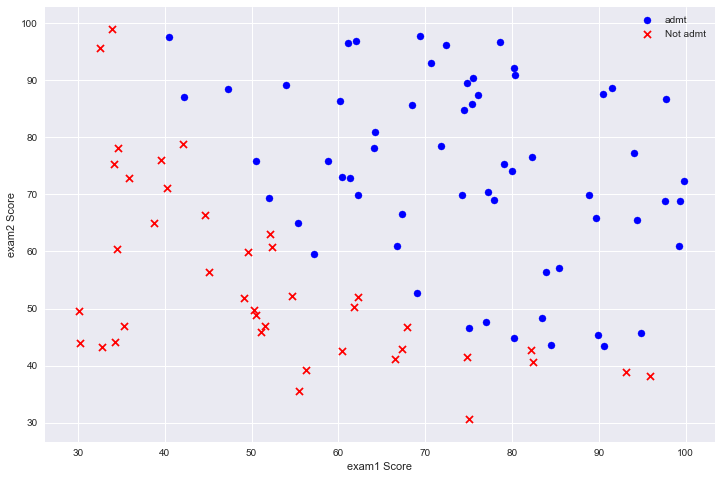

In [11]:

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(x=positive['exam1'],y= positive['exam2'], s=50, c='b', marker='o', label='admt')  
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not admt')  
ax.legend()  
ax.set_xlabel('exam1 Score')  
ax.set_ylabel('exam2 Score')  

In [12]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

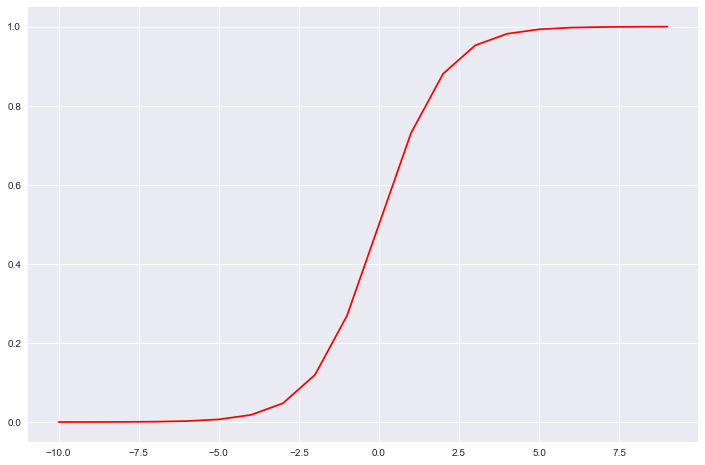

In [13]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(nums, sigmoid(nums), 'r')  

In [14]:
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-1*y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [15]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)  

In [16]:
X.shape, theta.shape, y.shape  

((100L, 3L), (3L,), (100L, 1L))

In [17]:
y=y.astype(float)
X=X.astype(float)

In [18]:
cost(theta, X, y)  

0.69314718055994529

In [19]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [20]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
result

(array([-25.16131874,   0.20623159,   0.20147149]), 36, 0)

In [21]:
cost(result[0], X, y)  

0.203497701589474

In [22]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [23]:
theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print ('accuracy = {0}%'.format(accuracy)  )

accuracy = 89%


In [24]:
theta_min


matrix([[-25.16131874,   0.20623159,   0.20147149]])

In [25]:
#Regularized Logistic Regression

In [26]:
data2 = pd.read_csv('ex2data2.csv', header=None, names=['t'])


data2['test1'] = data2['t'].apply(lambda title: title.split(',')[0])
data2['test2'] = data2['t'].apply(lambda title: title.split(',')[1])
data2['acpt'] = data2['t'].apply(lambda title: title.split(',')[2])
data2.drop('t',inplace=True,axis=1)
data2.to_excel('ex2data2.xlsx')

In [27]:
data2['test1']=data2['test1'].astype(float)
data2['test2']=data2['test2'].astype(float)

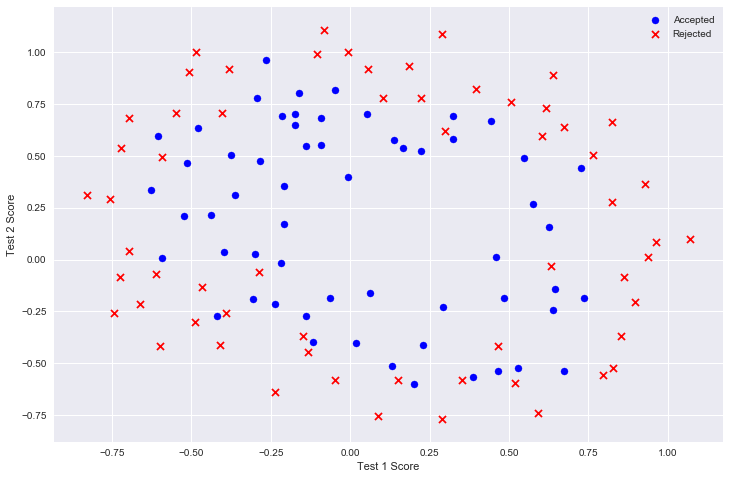

In [28]:

positive = data2[data2['acpt'] == '1']
negative = data2[data2['acpt'] == '0']

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')  

In [29]:
degree = 5  
x1 = data2['test1']  
x2 = data2['test2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('test1', axis=1, inplace=True)  
data2.drop('test2', axis=1, inplace=True)


data2.head()  

,acpt,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [30]:
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [31]:
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

In [32]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]  
X2 = data2.iloc[:,1:cols]  
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)  
y2 = np.array(y2.values)  
theta2 = np.zeros(11)

learningRate = 1



In [33]:
y2=y2.astype(float)
X2=X2.astype(float)

In [34]:
costReg(theta2, X2, y2, learningRate)  


0.6931471805599454

In [35]:
gradientReg(theta2, X2, y2, learningRate)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [36]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))  
result2

(array([  0.35924111,  -3.21901669,  18.95135746,  -4.26742928,
         18.21863498,  20.340235  ,   8.92282688, -43.73958419,
        -17.89167106, -50.69976532,  -2.8085298 ]), 110, 3)

In [37]:
theta_min = np.matrix(result2[0])  
predictions = predict(theta_min, X2)  
correct1 = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]  
accuracy = (sum(map(int, correct1)) % len(correct1))  
print ('accuracy = {0}%'.format(accuracy))

accuracy = 91%


In [38]:
#boundary diagrammes are to be drawm 


In [39]:
from sklearn import svm, datasets

In [40]:
data3 = np.matrix(data)

In [41]:
y1 = y

In [42]:
X1 = data3[:, 1:3]


In [43]:
h = .02  # step size in the mesh

In [44]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X1, y1)

C:\Users\Shekhar\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# create a mesh to plot in
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

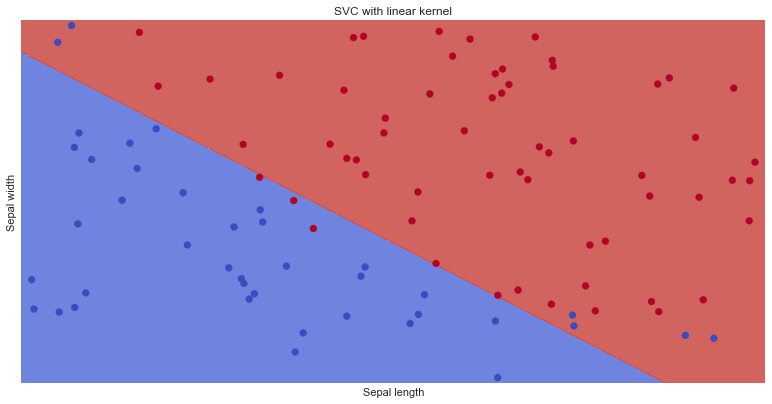

In [46]:
  # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(32,16))
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')


In [47]:
data3 = pd.read_csv('ex2data2.csv', header=None, names=['t'])


data3['test1'] = data3['t'].apply(lambda title: title.split(',')[0])
data3['test2'] = data3['t'].apply(lambda title: title.split(',')[1])
data3['acpt'] = data3['t'].apply(lambda title: title.split(',')[2])
data3.drop('t',inplace=True,axis=1)
data3.to_excel('ex2data2.xlsx')
data3.head()

,test1,test2,acpt
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.21371,0.69225,1
3,-0.375,0.50219,1
4,-0.51325,0.46564,1


In [48]:
data3['test1']=data3['test1'].astype(float)
data3['test2']=data3['test2'].astype(float)

In [49]:
data4= np.matrix(data3)


In [50]:
x = data4[:,:2]
Y = data4[:,2]
x=x.astype(float)
Y=Y.astype(float)

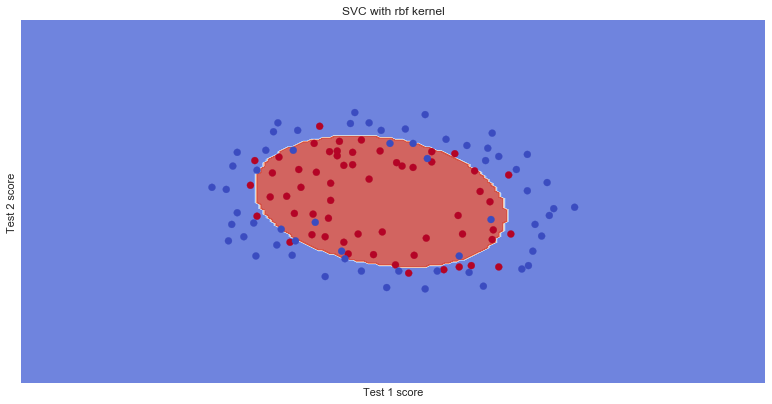

In [51]:
from sklearn import svm, datasets

h = .02  # step size in the mesh
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x, Y)
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
plt.figure(figsize=(32,16))
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(data3['test1'],data3['test2'], c=y2, cmap=plt.cm.coolwarm)
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with rbf kernel')